In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df=pd.read_excel("C:\\Users\\Umesh Gupta\\Downloads\\Data_Train.xlsx")
df_test=pd.read_excel("C:\\Users\\Umesh Gupta\\Downloads\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#checking shape
df.shape

(10683, 11)

In [5]:
#checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#checking nan value
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#checking basic info 
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<AxesSubplot:>

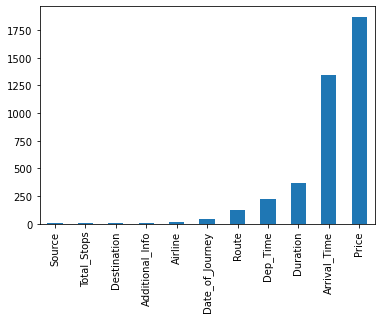

In [8]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

# univariate analysis

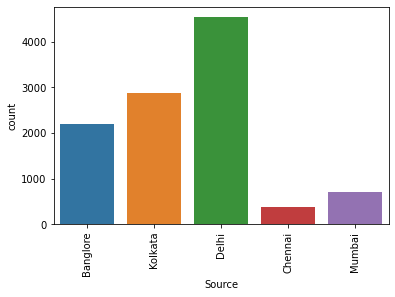

In [9]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()

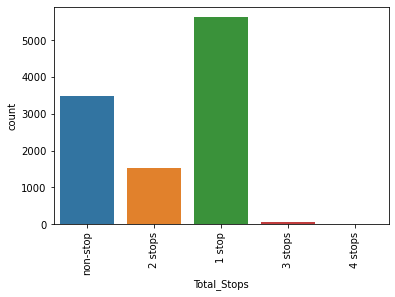

In [10]:
sns.countplot(df["Total_Stops"],data=df)
plt.xticks(rotation=90)
plt.show()

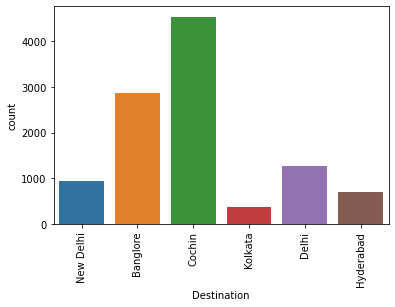

In [11]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

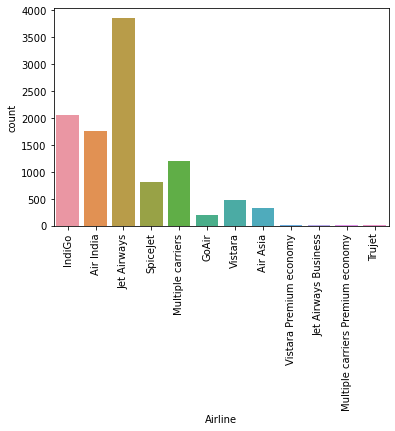

In [12]:
sns.countplot(df["Airline"],data=df)
plt.xticks(rotation=90)
plt.show()

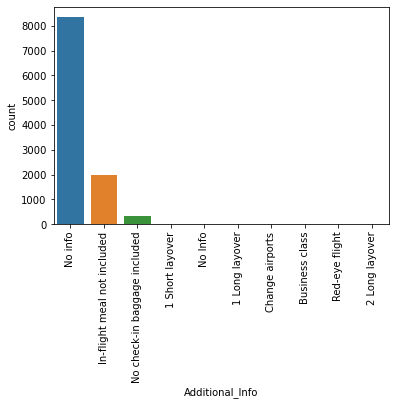

In [13]:
sns.countplot(df["Additional_Info"],data=df)
plt.xticks(rotation=90)
plt.show()

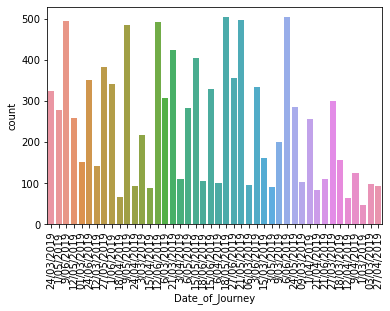

In [14]:
sns.countplot(df["Date_of_Journey"],data=df)
plt.xticks(rotation=90)
plt.show()

# feature engineering

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(10682, 11)

In [17]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
df["Date_of_Journey"]= pd.to_datetime(df["Date_of_Journey"])
df["Day"]=df["Date_of_Journey"].dt.day
df["Month"]=df["Date_of_Journey"].dt.month

In [19]:
df["Dep_Time"]= pd.to_datetime(df["Dep_Time"])

In [20]:
df["dep_hour"]=df["Dep_Time"].dt.hour

In [21]:
df["dep_min"]=df["Dep_Time"].dt.minute

In [22]:
df.drop(["Date_of_Journey","Dep_Time"],inplace=True,axis=1)

In [23]:
df["Arrival_Time"]= pd.to_datetime(df["Arrival_Time"])

In [24]:
df["arr_hour"]= df["Arrival_Time"].dt.hour

In [25]:
df["arr_min"]= df["Arrival_Time"].dt.minute

In [26]:
df.drop(["Arrival_Time"],inplace=True,axis=1)

In [27]:
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [28]:
df.drop(["Duration"],inplace=True,axis=1)

In [29]:
df["Route1"] = df["Route"].str.split("→").str[0]
df["Route2"] = df["Route"].str.split("→").str[1]
df["Route3"] = df["Route"].str.split("→").str[2]
df["Route4"] = df["Route"].str.split("→").str[3]

In [30]:
df.drop("Route",axis=1,inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,dep_hour,dep_min,arr_hour,arr_min,hours,minutes,Route1,Route2,Route3,Route4
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN


In [32]:
features=["Airline","Source","Destination","Total_Stops","Additional_Info","Route1","Route2","Route3","Route4"]

In [33]:
# for converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [34]:
label=LabelEncoder()
for i in df[features]:
    df[i]=label.fit_transform(df[i])
    
df
    

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,dep_hour,dep_min,arr_hour,arr_min,hours,minutes,Route1,Route2,Route3,Route4
0,3,0,5,4,8,3897,24,3,22,20,1,10,2,50,0,13,29,13
1,1,3,0,1,8,7662,5,1,5,50,13,15,7,25,2,25,1,3
2,4,2,1,1,8,13882,6,9,9,25,4,25,19,0,3,32,4,5
3,3,3,0,0,8,6218,5,12,18,5,23,30,5,25,2,34,3,13
4,3,0,5,0,8,13302,3,1,16,50,21,35,4,45,0,34,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,4,9,19,55,22,25,2,30,2,5,29,13
10679,1,3,0,4,8,4145,27,4,20,45,23,20,2,35,2,5,29,13
10680,4,0,2,4,8,7229,27,4,8,20,11,20,3,0,0,13,29,13
10681,10,0,5,4,8,12648,3,1,11,30,14,10,2,40,0,13,29,13


<function matplotlib.pyplot.show(close=None, block=None)>

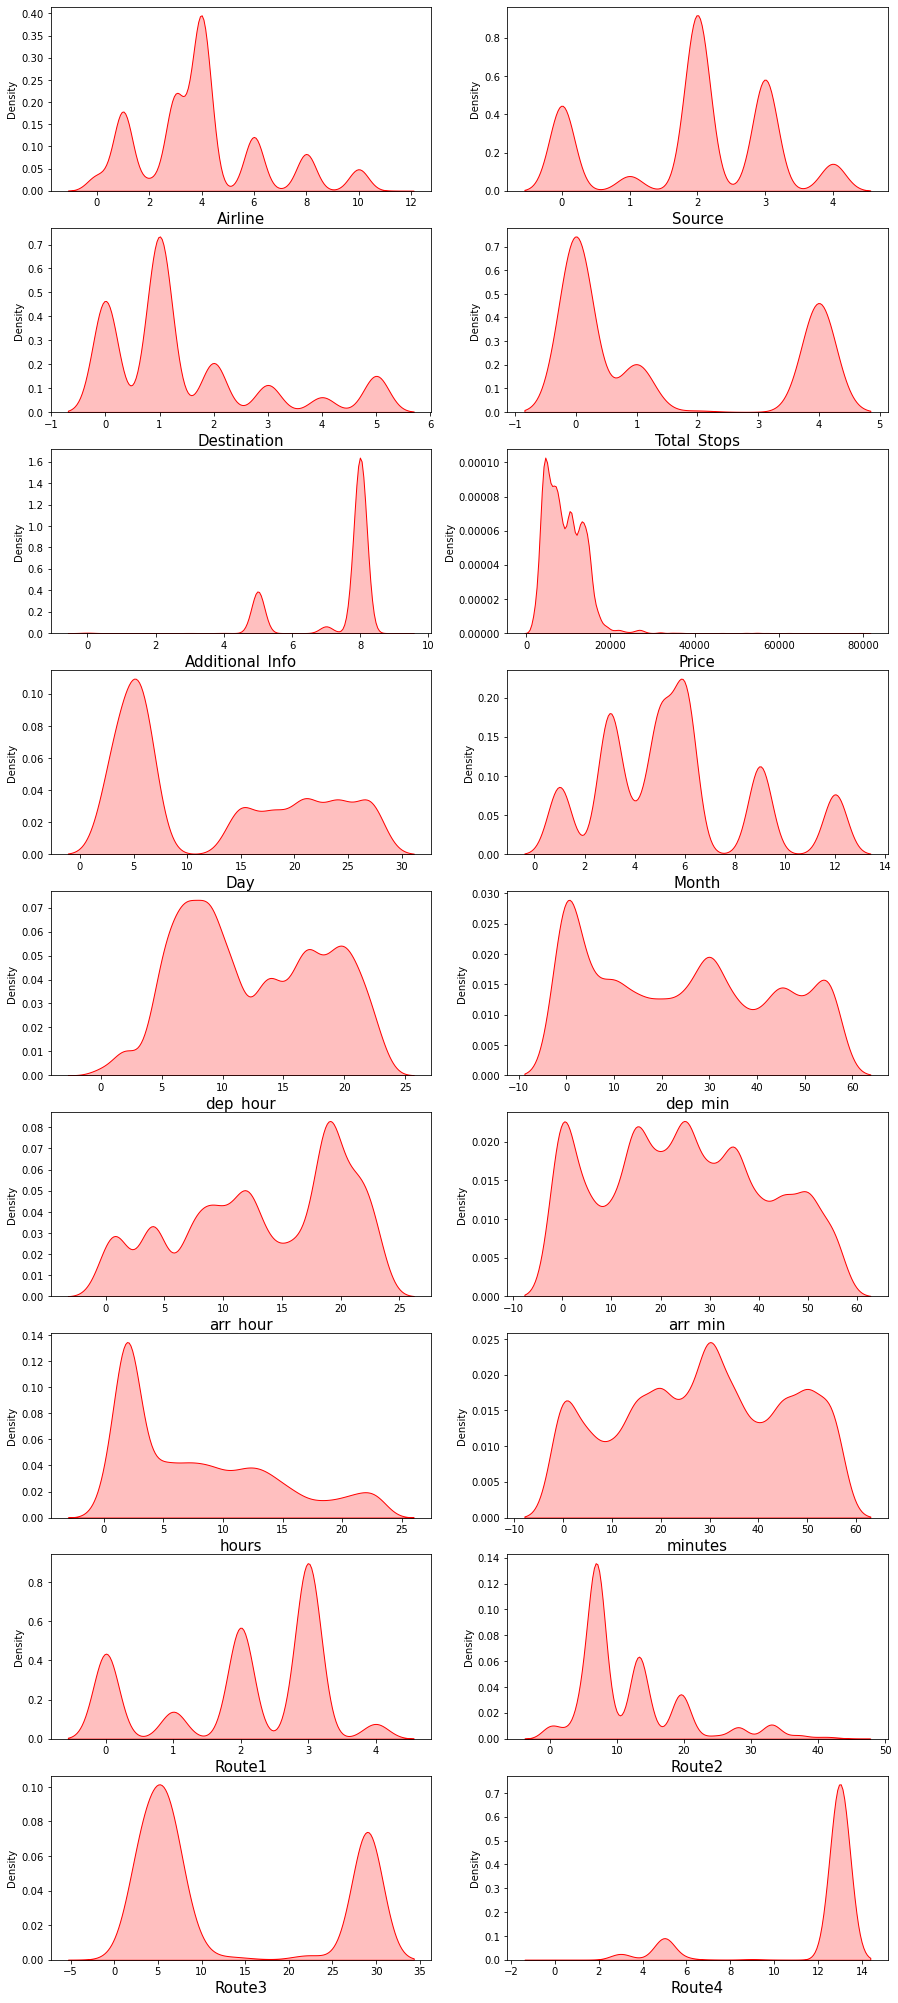

In [35]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

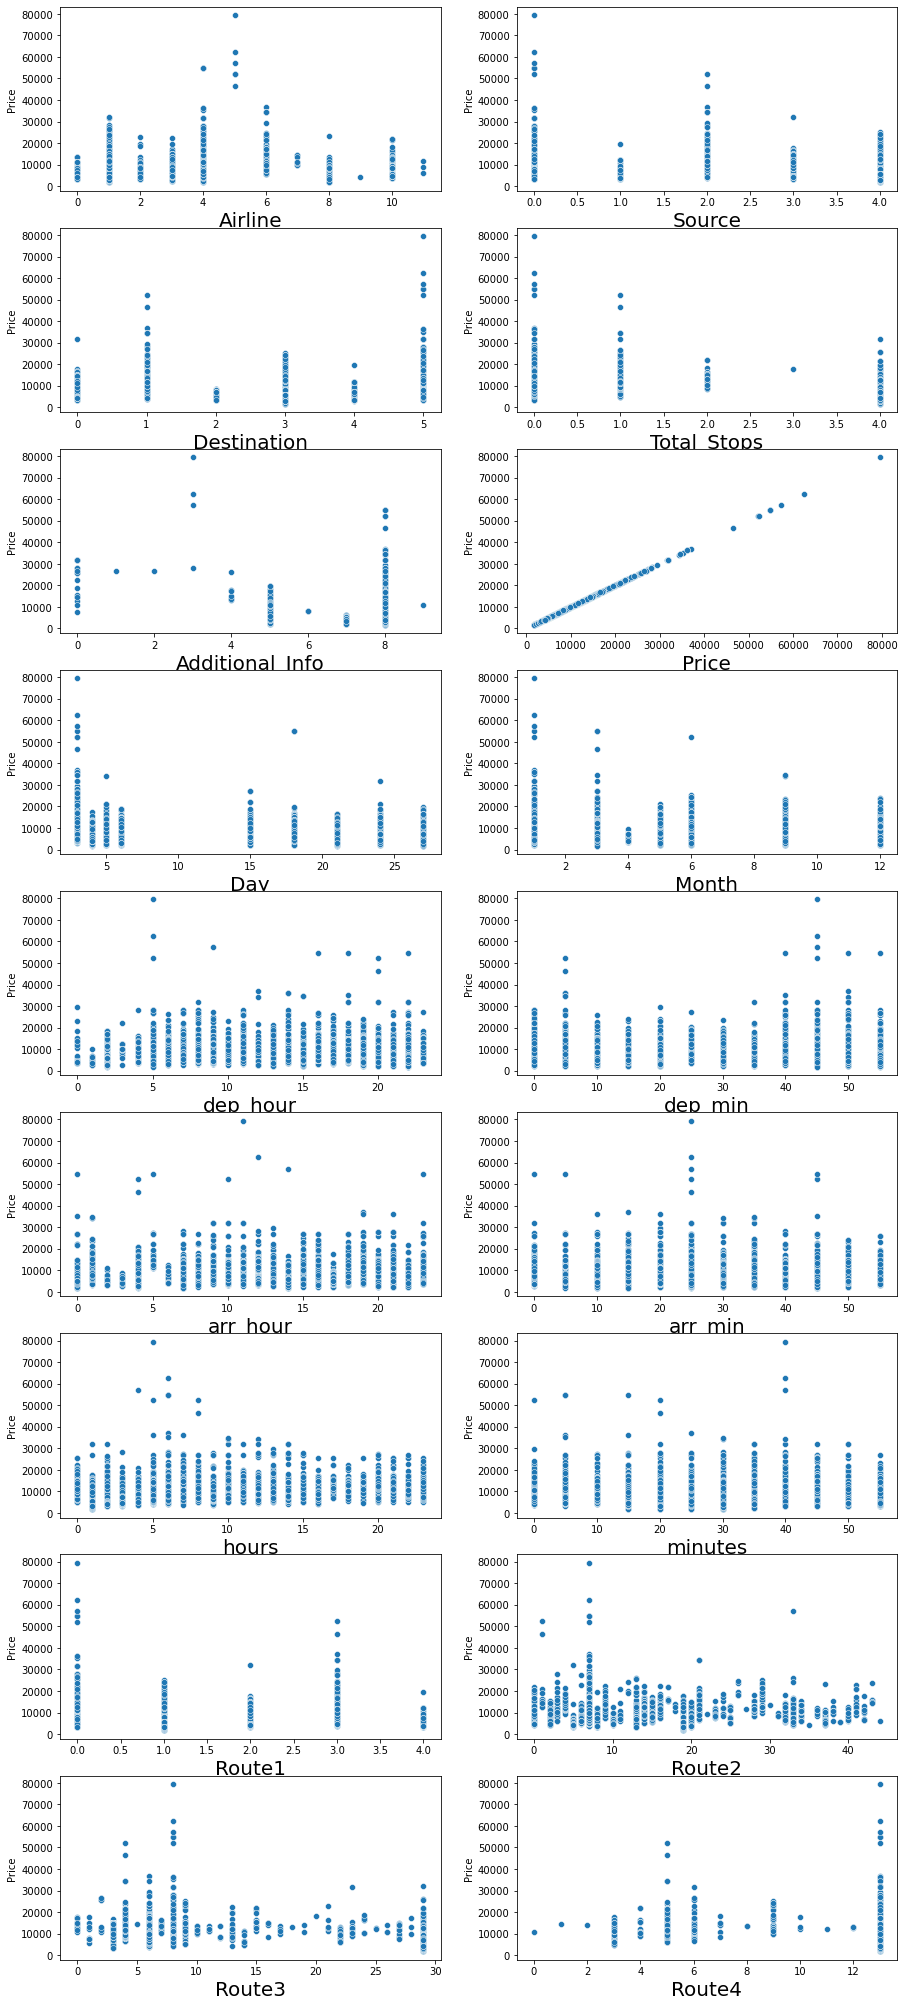

In [37]:
#bivariate analysis
plt.figure(figsize=(15,40))
plotnumber=1
for i in df:
    if plotnumber < 20:
        ax= plt.subplot(10,2,plotnumber)
        sns.scatterplot(y=df["Price"],x=df[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

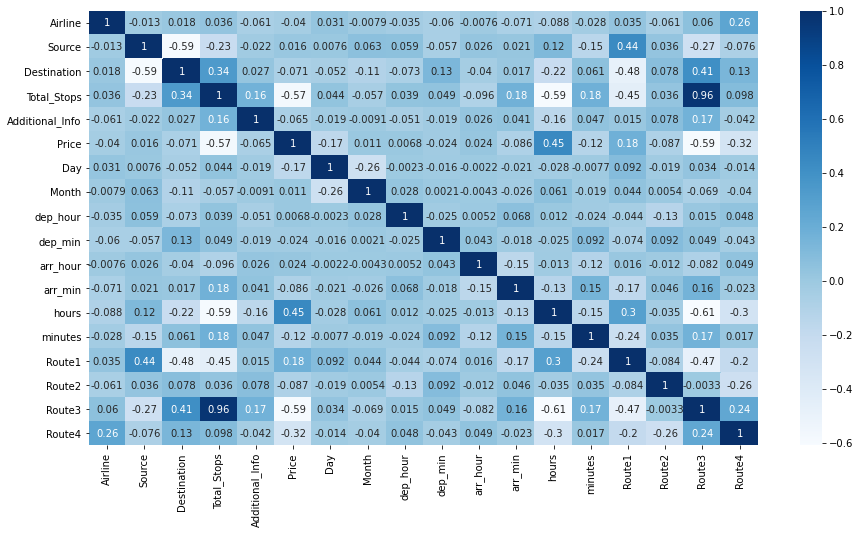

In [38]:
#multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

In [39]:
#droping duplicates
df.drop_duplicates(inplace=True)

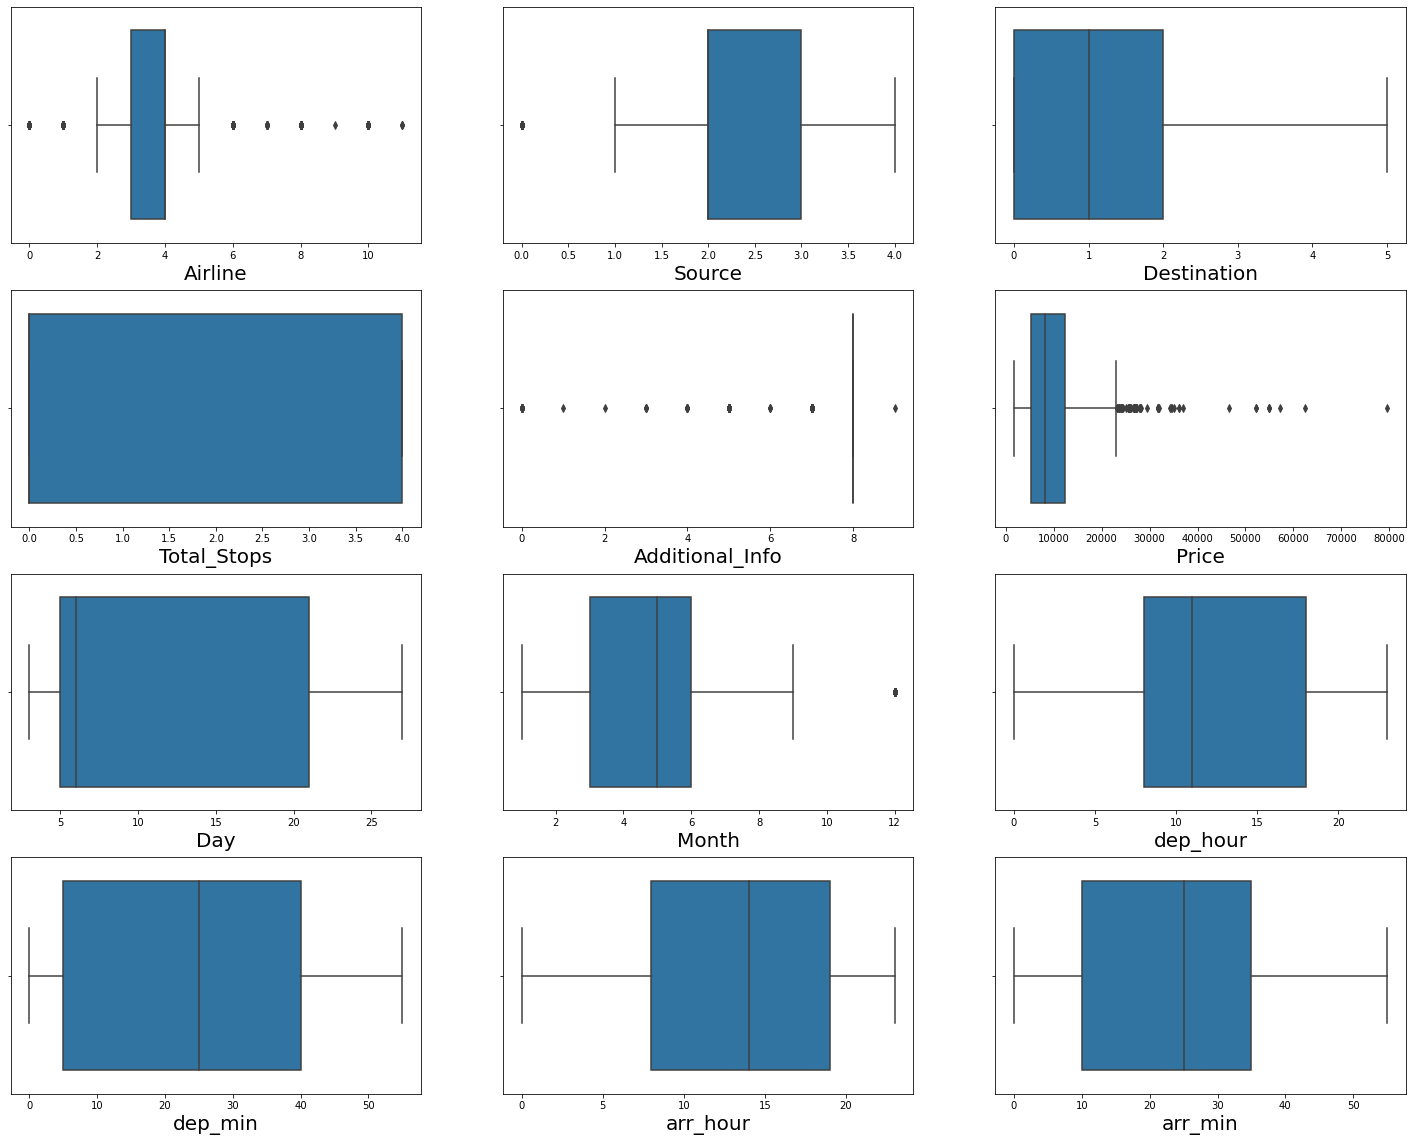

In [40]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,20))
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
# sknewness
df.skew()

Airline            0.723558
Source            -0.420015
Destination        1.225590
Total_Stops        0.617576
Additional_Info   -1.796042
Price              1.858123
Day                0.375943
Month              0.630431
dep_hour           0.108287
dep_min            0.171132
arr_hour          -0.379027
arr_min            0.110588
hours              0.829139
minutes           -0.085691
Route1            -0.594047
Route2             1.492230
Route3             0.597058
Route4            -2.294380
dtype: float64

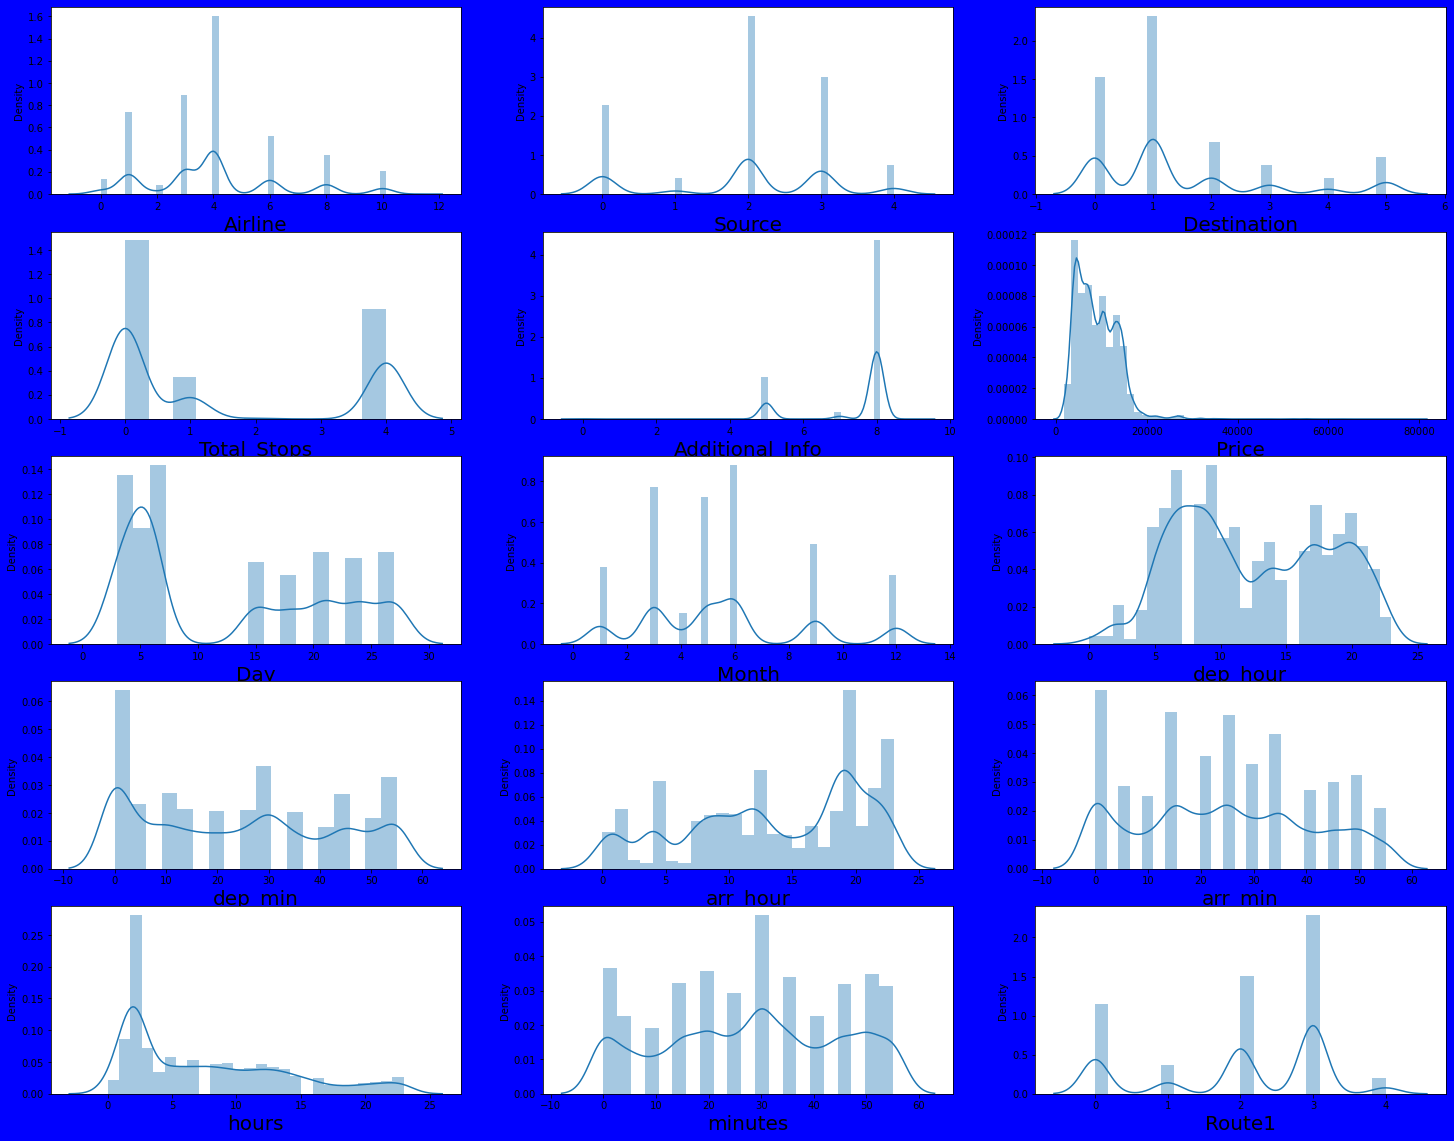

In [42]:
#for checking skewness
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# as all the column are categorical so we dont need to take care of skewness

In [43]:
df.shape

(10459, 18)

# testing dataset

In [44]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [45]:
#checking nan value
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
df_test["Date_of_Journey"]= pd.to_datetime(df_test["Date_of_Journey"])
df_test["Day"]=df_test["Date_of_Journey"].dt.day
df_test["Month"]=df_test["Date_of_Journey"].dt.month

In [47]:
df_test["Dep_Time"]= pd.to_datetime(df_test["Dep_Time"])
df_test["dep_hour"]=df_test["Dep_Time"].dt.hour
df_test["dep_min"]=df_test["Dep_Time"].dt.minute

In [48]:
df_test["Arrival_Time"]= pd.to_datetime(df_test["Arrival_Time"])
df_test["arr_hour"]= df_test["Arrival_Time"].dt.hour
df_test["arr_min"]= df_test["Arrival_Time"].dt.minute

In [49]:
s=pd.to_timedelta(df_test['Duration'])
df_test['hours']=s.dt.components['hours']
df_test['minutes']=s.dt.components['minutes']

In [50]:
df_test["Route1"] = df_test["Route"].str.split("→").str[0]
df_test["Route2"] = df_test["Route"].str.split("→").str[1]
df_test["Route3"] = df_test["Route"].str.split("→").str[2]
df_test["Route4"] = df_test["Route"].str.split("→").str[3]

In [51]:
df_test.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Route","Duration"],inplace=True,axis=1)

In [52]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,dep_hour,dep_min,arr_hour,arr_min,hours,minutes,Route1,Route2,Route3,Route4
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,17,30,4,25,10,55,DEL,BOM,COK,NaN
1,IndiGo,Kolkata,Banglore,1 stop,No info,5,12,6,20,10,20,4,0,CCU,MAA,BLR,NaN
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45,DEL,BOM,COK,NaN
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,8,0,21,0,13,0,DEL,BOM,COK,NaN
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,23,55,2,45,2,50,BLR,DEL,NaN,NaN


In [53]:
df_test.drop_duplicates(inplace=True)

In [54]:
df_test.shape

(2644, 17)

In [55]:
features=["Airline","Source","Destination","Total_Stops","Additional_Info","Route1","Route2","Route3","Route4"]

In [56]:
# for converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [57]:
label=LabelEncoder()
for i in df_test[features]:
    df_test[i]=label.fit_transform(df_test[i])
    
df_test
    

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,dep_hour,dep_min,arr_hour,arr_min,hours,minutes,Route1,Route2,Route3,Route4
0,4,2,1,0,5,6,6,17,30,4,25,10,55,3,7,5,9
1,3,3,0,0,5,5,12,6,20,10,20,4,0,2,29,3,9
2,4,2,1,0,3,21,5,19,15,19,0,23,45,3,7,5,9
3,6,2,1,0,5,21,5,8,0,21,0,13,0,3,7,5,9
4,0,0,2,4,5,24,6,23,55,2,45,2,50,0,13,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,5,6,6,20,30,20,25,23,55,2,14,3,9
2667,3,3,0,4,5,27,3,14,20,16,55,2,35,2,5,27,9
2668,4,2,1,0,5,3,6,21,50,4,25,6,35,3,7,5,9
2669,1,2,1,0,5,3,6,4,0,19,15,15,15,3,7,5,9


In [411]:
df_test.drop("Additional_Info",axis=1,inplace=True)

In [412]:
df_test

,Airline,Source,Destination,Total_Stops,Day,Month,dep_hour,dep_min,arr_hour,arr_min,hours,minutes,Route1,Route2,Route3,Route4
0,4,2,1,0,6,6,17,30,4,25,10,55,3,7,5,9
1,3,3,0,0,5,12,6,20,10,20,4,0,2,29,3,9
2,4,2,1,0,21,5,19,15,19,0,23,45,3,7,5,9
3,6,2,1,0,21,5,8,0,21,0,13,0,3,7,5,9
4,0,0,2,4,24,6,23,55,2,45,2,50,0,13,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,6,6,20,30,20,25,23,55,2,14,3,9
2667,3,3,0,4,27,3,14,20,16,55,2,35,2,5,27,9
2668,4,2,1,0,3,6,21,50,4,25,6,35,3,7,5,9
2669,1,2,1,0,3,6,4,0,19,15,15,15,3,7,5,9


In [92]:
#splitting dataset
x=df.drop(columns=["Price","Additional_Info"],axis=1)
y=df["Price"]


In [87]:
#for selecting best column
from sklearn.feature_selection import chi2,SelectPercentile,f_classif
s=SelectPercentile(score_func=chi2,percentile=70)
f_values=s.fit(x,y)

In [88]:
cols=s.get_support(indices=True)
features=x.columns[cols]

In [89]:
df_score=pd.DataFrame({"features":x.columns,"s_score":s.pvalues_})

In [90]:
df_score.sort_values(by="s_score")

,features,s_score
0,Airline,0.000000
14,Route2,0.000000
13,Route1,0.000000
12,minutes,0.000000
11,hours,0.000000
10,arr_min,0.000000
9,arr_hour,0.000000
15,Route3,0.000000
8,dep_min,0.000000
6,Month,0.000000


In [93]:
#model building
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor


In [94]:
#scaling dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [251]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=250)

In [252]:
kf=KFold(n_splits=5,random_state=250,shuffle=True)

# XGBRegressor

In [253]:
clf = XGBRegressor(verbosity=0)
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [254]:
y_pred = clf.predict(x_test)

In [255]:
r2_score(y_test,y_pred)

0.845865653693501

In [256]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.8386578813647301

# BaggingRegressor

In [257]:
bg = BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor()

In [258]:
y_pred = bg.predict(x_test)

In [259]:
r2_score(y_test,y_pred)

0.8086724065470705

In [260]:
cross_val_score(bg,x_scaled,y,cv=5).mean()

0.790946083049109

# GradientBoostingRegressor

In [261]:
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [262]:
y_pred = gd.predict(x_test)

In [263]:
r2_score(y_test,y_pred)

0.7978388033175622

In [264]:
cross_val_score(gd,x_scaled,y,cv=5).mean()

0.7889847480525664

# LinearRegression

In [269]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [270]:
y_pred = dt.predict(x_test)

In [271]:
r2_score(y_test,y_pred)

0.6835834021342617

In [273]:
cross_val_score(dt,x_scaled,y,cv=5).mean()

0.64756278504537

# XGBRegressor is my best model

In [397]:
# para meter tuning
grid_params={"n_estimators":[45,46,47],
             "random_state":[46,47,48],
             "max_features":[0,1,2,3,4,5],
             "max_depth":[5,6,7]
            }

In [398]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_params,
                          cv=3)

In [399]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=47, n_jobs=8,
                                    num_parallel_tree=1, random_state=47,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None, warm_st

In [400]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 0, 'n_estimators': 47, 'random_state': 46}

In [401]:
clf=XGBRegressor(n_estimators=47,warm_start=True,random_state=46,max_features=0)
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=47, n_jobs=8,
             num_parallel_tree=1, random_state=46, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None, warm_start=True)

In [402]:
y_pred=clf.predict(x_test)

In [403]:
r2_score(y_test,y_pred)

0.8490935845545557

In [404]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.8415807708658303

# Passing the actual testing dataset in best model

In [415]:
y_pred=clf.predict(scale.fit_transform(df_test))

In [416]:
#SAVING THE PREDICTED DATASET
save=pd.DataFrame(y_pred)

In [417]:
import pickle
filename='flightprice.pk1'
pickle.dump(clf,open(filename,'wb'))